In [1]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import itertools

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
seed=10

In [4]:
first=pd.read_csv('first_tr.csv',header=None)
second=pd.read_csv('second_tr.csv',header=None)
data=pd.concat([first,second],ignore_index=True)
test=pd.read_csv('test_MD.csv',header=None)
train_data=data.iloc[:,:-2]
train_label=data.iloc[:,-1]
test_data=test.iloc[:,:-2]
a=test.iloc[:,-1]
t=test.iloc[:,-2]
y_true=np.array(a).tolist()
scalar = MinMaxScaler()
train_data_1=scalar.fit(train_data).transform(train_data)
test_data_1=scalar.fit(test_data).transform(test_data)

In [5]:
scoring = 'accuracy'
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, train_data_1, train_label, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
LDA: 0.975000 (0.075000)
KNN: 0.975000 (0.075000)
CART: 0.950000 (0.100000)
NB: 1.000000 (0.000000)
XGB: 0.980000 (0.060000)
GB: 1.000000 (0.000000)
SGD: 0.975000 (0.075000)
RF: 1.000000 (0.000000)


In [6]:
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

In [7]:
svm = svm.SVC(kernel='rbf',C=1,gamma='auto',probability=True,random_state=0)
y_score = svm.fit(train_data_1, train_label).decision_function(test_data_1)
fpr,tpr,threshold = roc_curve(y_true, y_score) ###calculate true positive and false positive
roc_auc = auc(fpr,tpr) ###计calculate the value for roc

In [8]:
y_pre=svm.predict(test_data_1)

In [9]:
y_score

array([ 1.46728236,  1.14472397,  1.32301483,  1.06783212,  1.33660082,
        0.91778804,  1.01042268, -1.34390772, -1.04659385, -1.16321457,
       -1.24368843, -1.3588783 , -1.26625387, -1.48391681, -1.10444282,
       -0.48748331, -0.89567048, -1.35670966])

In [10]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

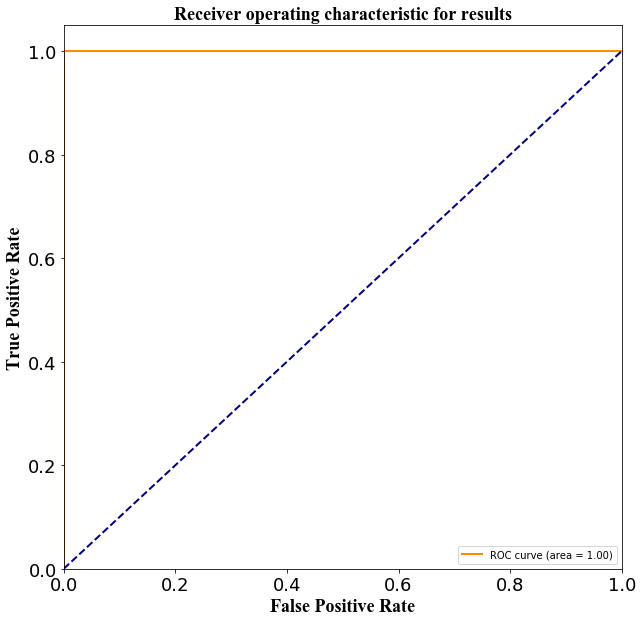

In [11]:
plt.figure()
lw = 2
figure=plt.figure(figsize=(10,10))
plt.tick_params(labelsize=18)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
font1={
    'family':'Times New Roman',
    'size':18,
}
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('Receiver operating characteristic for results',font1)
plt.legend(loc="lower right")
plt.show()

In [12]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=False):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix for prediction')
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('misclass={:0.4f}'.format(misclass))

Normalized confusion matrix


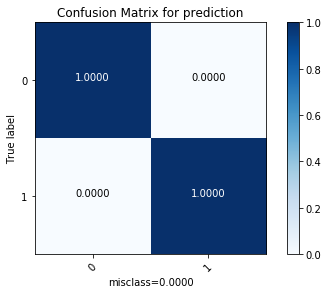

In [13]:
#Drawing confusion matrix plots
cm=confusion_matrix(y_true, y_pre)
plot_confusion_matrix(cm,target_names=['0','1'],normalize=True)

In [14]:
#figure.savefig('ROCcurve.png')

In [15]:
figure.savefig('matrix.png')